In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.chdir("/content/gdrive/My Drive/Upwork/")
os.getcwd()

'/content/gdrive/My Drive/Upwork'

# Mean Shift Clustering Using the Waves Measuring Buoys Data Set
##### data can be found on Kaggle

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
data = pd.read_csv("/content/gdrive/My Drive/OwnJupyterNotebooks/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv")
data.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


In [4]:
data.tail()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95
43727,30/06/2019 23:30,1.926,2.98,8.509,12.228,84.0,21.95


In [5]:
data.shape

(43728, 7)

In [6]:
data.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000
mean,1.041140,1.891779,5.412332,8.794887,97.395310,23.207409
std,4.485922,4.580826,4.739317,5.358859,28.782966,9.813377
min,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,0.838000,1.410000,4.974000,7.286000,85.000000,21.900000
50%,1.129000,1.900000,5.525000,8.881000,99.000000,23.950000
75%,1.542000,2.600000,6.162000,10.663250,116.000000,26.050000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000


In [7]:
data['Date/Time'][:5]

0    01/01/2017 00:00
1    01/01/2017 00:30
2    01/01/2017 01:00
3    01/01/2017 01:30
4    01/01/2017 02:00
Name: Date/Time, dtype: object

In [8]:
data = data.copy()
data.drop('Date/Time',axis=1, inplace=True)
data.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,0.875,1.39,4.421,4.506,-99.9,-99.90
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45


In [9]:
data.replace({-99.900:0,-99.90:0,-99.9:0},inplace=True)
data = data.copy()
data.head(2)

,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,0.000,0.00,0.000,0.000,0.0,0.0
1,0.875,1.39,4.421,4.506,0.0,0.0


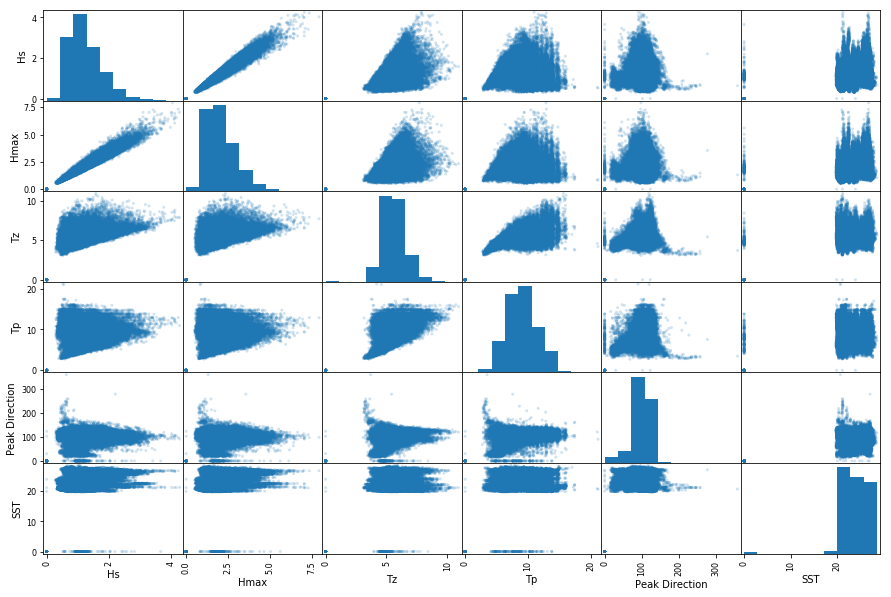

In [10]:
# Scatterplot Matrix

pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(15, 10))
plt.show()

In [0]:
data = data.sample(frac=.10)

In [0]:
data = data[['Hs','Hmax']].copy()

In [0]:

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X = data
X_std = scaler.fit_transform(X)

In [0]:

clt = MeanShift(n_jobs=-1)
model = clt.fit_predict(X_std)


In [28]:
print(model)

[2 0 0 ... 0 0 0]
